<a href="https://colab.research.google.com/github/Kondratyevivan/AI_Arch_IU/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab

In [ ]:
url='https://drive.google.com/file/d/1nqnqUuYnUJNKOeCaKzz_hEMxw0r4wPwb/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
chtoto=url.split('/')[-2]
df = pd.read_csv(url)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#подсчитываем количество пустых ячеек в столбцах
empty_cells = df.isna().sum()
print("количество пустых ячеек по столбцам:\n",empty_cells)
#суммируем количество пустых ячеек
sum_cells = empty_cells.values.sum()
print("суммарное количество пустых ячеек:",sum_cells)

количество пустых ячеек по столбцам:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
суммарное количество пустых ячеек: 866


In [ ]:
#Заполняем пустые ячейки различными методами
print("Заполняем пустые ячейки разными методами")
df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna(method='ffill')
df['Cabin'] = df['Cabin'].fillna(method='bfill')
df['Embarked'] = df['Embarked'].fillna(method='ffill')

Заполняем пустые ячейки разными методами


In [ ]:
corr_age = df['Age'].corr(df['Survived'])
corr_parch = df['Parch'].corr(df['Survived'])
corr_parch

0.08162940708348372

In [ ]:
#строим матрицу корреляций
corr_m = df.corr()
print(corr_m['Survived'])
#Чем ближе значение к 1 или -1, тем больше зависимость
print("Из полученных данных можно предположить, что наиболее сильно на выживаемость человека при крушении влияла цена билета и класс круиза")

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64
Из полученных данных можно предположить, что наиболее сильно на выживаемость человека при крушении влияла цена билета и класс круиза


<ipython-input-76-979d86f47498>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_m = df.corr()


In [ ]:
df_pclass = df[['Pclass','Survived']]

In [ ]:
df_pclass

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [ ]:
def fill(row):
  if (row['Pclass'] == 1)& (row['Survived'] ==1):
    return 'Выжившие 1 класса'
  elif (row['Pclass'] == 2)& (row['Survived'] ==1):
    return 'Выжившие 2 класса'
  elif (row['Pclass'] == 3)& (row['Survived'] ==1):
    return 'Выжившие 3 класса'
  elif (row['Pclass'] == 1)& (row['Survived'] ==0):
    return 'Погибшие 1 класса'
  elif (row['Pclass'] == 2)& (row['Survived'] ==0):
    return 'Погибшие 2 класса'
  elif (row['Pclass'] == 3)& (row['Survived'] ==0):
    return 'Погибшие 3 класса'

In [ ]:
df_pclass['SurvivedClass']=df_pclass.apply(fill,axis=1)

<ipython-input-80-9b44811f17b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pclass['SurvivedClass']=df_pclass.apply(fill,axis=1)


In [ ]:
df_pclass

,Pclass,Survived,SurvivedClass
0,3,0,Погибшие 3 класса
1,1,1,Выжившие 1 класса
2,3,1,Выжившие 3 класса
3,1,1,Выжившие 1 класса
4,3,0,Погибшие 3 класса
...,...,...,...
886,2,0,Погибшие 2 класса
887,1,1,Выжившие 1 класса
888,3,0,Погибшие 3 класса
889,1,1,Выжившие 1 класса


In [ ]:
a = df_pclass['SurvivedClass'].value_counts()

In [ ]:
a

Погибшие 3 класса    372
Выжившие 1 класса    136
Выжившие 3 класса    119
Погибшие 2 класса     97
Выжившие 2 класса     87
Погибшие 1 класса     80
Name: SurvivedClass, dtype: int64

Общее количество погибших и выживших в разных классах


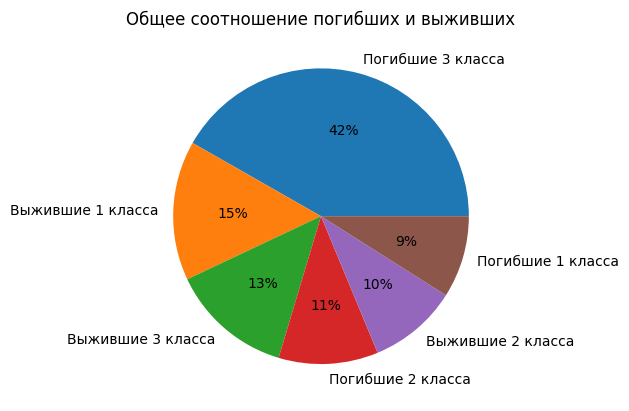

In [ ]:
a.plot(kind='pie', ylabel = '',autopct='%1.0f%%', title = 'Общее соотношение погибших и выживших')
print('Общее количество погибших и выживших в разных классах')

In [ ]:
third_class = df_pclass.loc[df_pclass.Pclass == 3,:]
third_class_count = third_class['SurvivedClass'].value_counts()
second_class = df_pclass.loc[df_pclass.Pclass == 2,:]
second_class_count = second_class['SurvivedClass'].value_counts()
first_class = df_pclass.loc[df_pclass.Pclass == 1,:]
first_class_count = first_class['SurvivedClass'].value_counts()



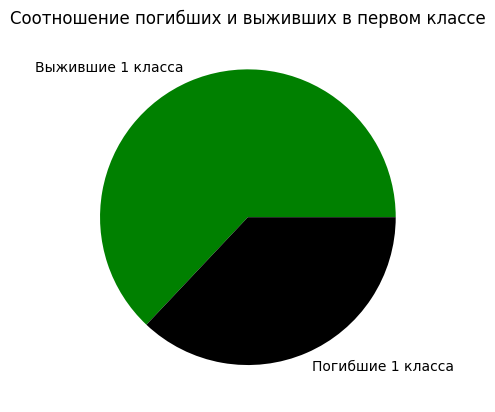

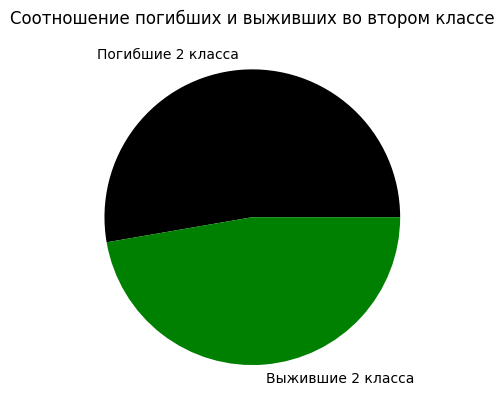

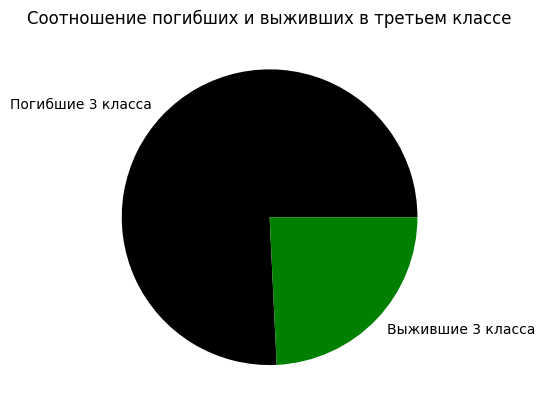

In [ ]:
plt.figure(0)
first_class_count.plot(kind='pie', ylabel = '',colors=['green','black'], title = 'Соотношение погибших и выживших в первом классе')
plt.figure(1)
second_class_count.plot(kind='pie', ylabel = '',colors=['black','green'], title = 'Соотношение погибших и выживших во втором классе')
plt.figure(2)
figure1 = third_class_count.plot(kind='pie', ylabel = '',colors=['black','green'], title = 'Соотношение погибших и выживших в третьем классе')
plt.show()

